In [ ]:
# install sklearn
# !pip install sklearn

In [4]:
# Draw vector representations of words

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [1]:
sentences = ["I like deep learning", "I like NLP", "I enjoy flying"]

# Tokenize the sentences
tokenized_sentences = [s.split() for s in sentences]

# Build the co-occurrence matrix
window_size = 2
vocab = {}
for sent in tokenized_sentences:
    for i, word in enumerate(sent):
        for neighbor in sent[max(i - window_size, 0) : min(i + window_size, len(sent)) + 1] :
            if neighbor != word:
                if word not in vocab:
                    vocab[word] = len(vocab)
                if neighbor not in vocab:
                    vocab[neighbor] = len(vocab)

vocab_size = len(vocab)
print(vocab)


{'I': 0, 'like': 1, 'deep': 2, 'learning': 3, 'NLP': 4, 'enjoy': 5, 'flying': 6}


In [ ]:
# display word vectors
def display_pca_scatterplot(model, words=None, sample=0):
    if words is None:
        if sample > 0:
            words = np.random.choice(list(model.wv.vocab.keys()), sample)
        else:
            words = [word for word in model.wv.vocab]

    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:, :2]

    plt.figure(figsize=(6, 6))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors="k", c="r")
    for word, (x, y) in zip(words, twodim):
        plt.text(x + 0.05, y + 0.05, word)

    plt.show()

In [36]:
# draw some vectors with arrows in matplotlib
def draw_vectors(word_vectors, words, xlim=(0, 1), ylim=(0, 1), save_file=None, xtitle=None, ytitle=None, title=None):
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    # set xtitle
    if xtitle is not None:
        ax.set_xlabel(xtitle, fontsize=20)
    # set ytitle
    if ytitle is not None:
        ax.set_ylabel(ytitle, fontsize=20)
    # set title
    if title is not None:
        ax.set_title(title, fontsize=20)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    for word, (x, y) in zip(words, word_vectors):
        ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.1, linewidth=2, length_includes_head=True)
        ax.text(x, y, word, fontsize=20)
    if save_file is not None:
        plt.savefig(save_file, format="png", dpi=300)
    plt.show()



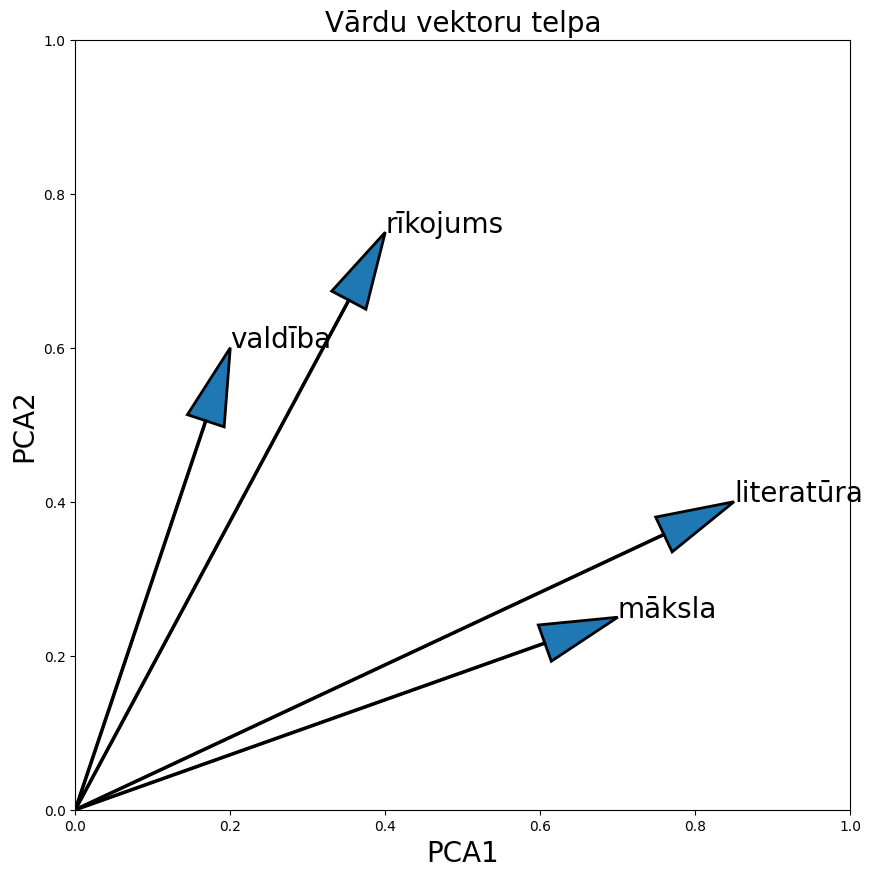

In [37]:
word_vectors = [(0.70, 0.25), (0.85, 0.40), (0.20, 0.6), (0.4, 0.75)]
words = ["māksla", "literatūra", "valdība", "rīkojums"]
draw_vectors(word_vectors, words, save_file="word_vectors.png", xtitle="PCA1", ytitle="PCA2", title="Vārdu vektoru telpa") 	

In [55]:
# draw manhattan distance visualization
# given two vectors, draw a line between them

def draw_manhattan_distance(vector_1, vector_2, vector_1_label=None, vector_2_label=None, save_file=None, xtitle=None, ytitle=None, title=None):
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    if title is not None:
        ax.set_title(title, fontsize=20)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.arrow(0, 0, vector_1[0], vector_1[1], head_width=0.05, head_length=0.1, linewidth=2, length_includes_head=True)
    if vector_1_label is not None:
        ax.text(vector_1[0], vector_1[1]-0.05, vector_1_label, fontsize=20)
    ax.arrow(0, 0, vector_2[0], vector_2[1], head_width=0.05, head_length=0.1, linewidth=2, length_includes_head=True)
    if vector_2_label is not None:
        ax.text(vector_2[0], vector_2[1]+0.01, vector_2_label, fontsize=20)
    ax.arrow(vector_1[0], vector_1[1], vector_2[0] - vector_1[0], 0, head_width=0.05, head_length=0.1, linewidth=2, length_includes_head=True, color="r")
    ax.arrow(vector_2[0], vector_1[1], 0, vector_2[1]-vector_1[1], head_width=0.05, head_length=0.1, linewidth=2, length_includes_head=True, color="r")
    if save_file is not None:
        plt.savefig(save_file, format="png", dpi=300) 
    plt.show()

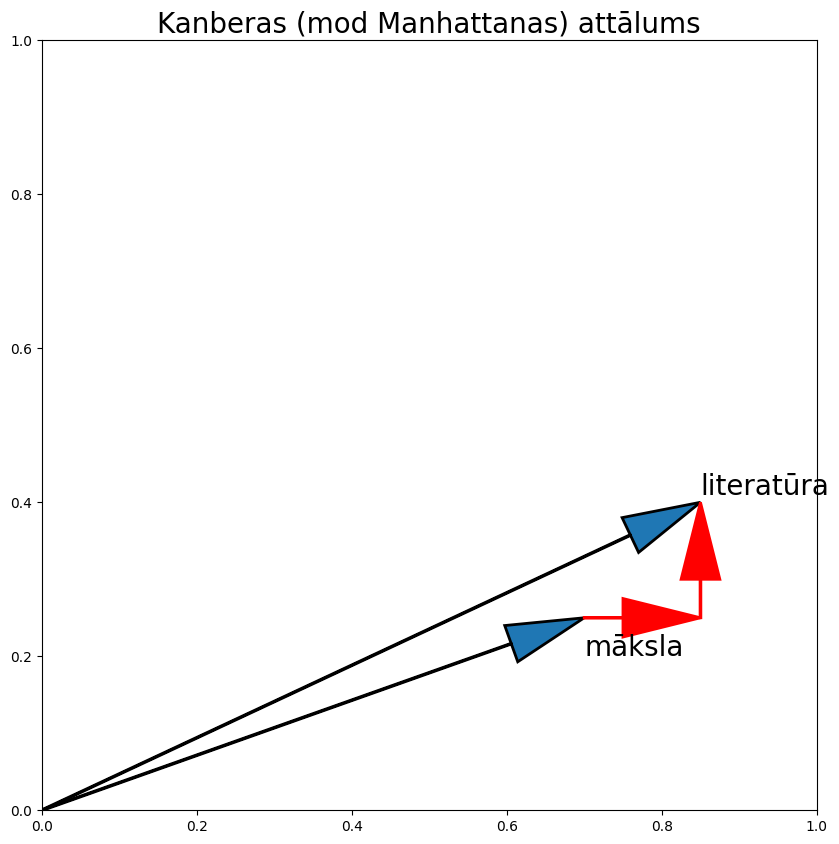

In [56]:
draw_manhattan_distance((0.70, 0.25), (0.85, 0.40), vector_1_label="māksla", vector_2_label="literatūra", save_file="manhattan_distance.png", xtitle="PCA1", ytitle="PCA2", title="Kanberas (mod Manhattanas) attālums")